In [ ]:
from tensorflow import keras
import cv2
import os
from tensorflow.keras.models import load_model

# 모델을 불러온다.
model = load_model('/content/drive/MyDrive/ResNet101_All.h5')

# 이미지를 분류하는 함수
def classify_images(model, image_folder):
    class_names = ['front', 'left', 'right', 'back']
    for file_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, file_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        img = img.reshape(1, 224, 224, 3)
        predictions = model.predict(img)
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]
        print(f"{file_name}: {predicted_class_name}")

image_folder = '/content/drive/MyDrive/image' # 이미지 경로
classify_images(model, image_folder)

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/ResNet101_All.h5'
model = load_model(model_path)

test_image_folder = '/content/drive/MyDrive/dataset/test2'

class_names = ['back_left', 'back_left_hurray', 'back_left_left', 'back_left_right', 'back_right', 'back_right_hurray', 'back_right_left', 'back_right_right', 'front', 'front_hurray', 'front_left_raised', 'front_right_raised', 'left', 'left_chopping', 'right', 'right_chopping']

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    predictions = model.predict(x)
    return np.argmax(predictions)

for file_name in os.listdir(test_image_folder):
    image_path = os.path.join(test_image_folder, file_name)
    predicted_class_index = predict_image(model, image_path)
    predicted_class_name = class_names[predicted_class_index]
    print(f"{file_name}: {predicted_class_name}")

1/1 [==============================] - 2s 2s/step
back_left385.jpg: back_left
1/1 [==============================] - 0s 32ms/step
back_left426.jpg: back_left
1/1 [==============================] - 0s 30ms/step
back_left407.jpg: back_left
1/1 [==============================] - 0s 27ms/step
back_left45.jpg: back_left
1/1 [==============================] - 0s 29ms/step
back_left391.jpg: back_left
1/1 [==============================] - 0s 30ms/step
back_left415.jpg: back_left
1/1 [==============================] - 0s 29ms/step
back_left402.jpg: back_left
1/1 [==============================] - 0s 27ms/step
back_left397.jpg: back_left
1/1 [==============================] - 0s 29ms/step
back_left384.jpg: back_left
1/1 [==============================] - 0s 29ms/step
back_left380.jpg: back_left
1/1 [==============================] - 0s 29ms/step
back_left308.jpg: back_left
1/1 [==============================] - 0s 30ms/step
back_left31.jpg: back_left
1/1 [==============================] - 0s 27

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/data2_3frame/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet101_All.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.2f}'.format(accuracy))
print('정밀도 : {:.2f}'.format(precision))
print('재현율 : {:.2f}'.format(recall))
print('F1-score : {:.2f}'.format(f1score))

Found 349 images belonging to 16 classes.
349/349 [==============================] - 183s 519ms/step
테스트 결과
---------------------
back_left/back_left0.jpg : back_left
back_left/back_left100.jpg : back_right
back_left/back_left107.jpg : right
back_left/back_left128.jpg : right
back_left/back_left138.jpg : right
back_left/back_left146.jpg : right
back_left/back_left16.jpg : back_right
back_left/back_left162.jpg : right
back_left/back_left165.jpg : right
back_left/back_left170.jpg : right
back_left/back_left18.jpg : back_right
back_left/back_left180.jpg : right
back_left/back_left195.jpg : right
back_left/back_left200.jpg : right
back_left/back_left50.jpg : back_right
back_left/back_left54.jpg : back_right
back_left/back_left74.jpg : back_right
back_left/back_left83.jpg : back_right
back_left/back_left92.jpg : back_right
back_left/back_left94.jpg : back_right
back_left/back_left97.jpg : back_right
back_left_hurray/back_left_hurray102.jpg : back_right_right
back_left_hurray/back_left_hurra

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 3s 3s/step


Image: image8.jpg
Class: ['front', 'left', 'right', 'back']
Class Index: 3
Prediction: 1.0


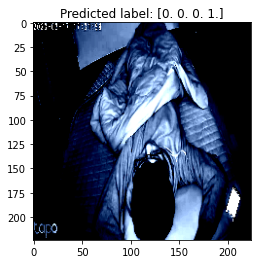

In [ ]:
import cv2
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# 모델 불러오기
model = keras.models.load_model('/content/drive/MyDrive/ResNet101_Practice/ResNet101_Practice.h5')

# 이미지가 있는 폴더 경로
image_folder_path = '/content/drive/MyDrive/image'

# 폴더 내 이미지 파일 리스트 가져오기
image_list = os.listdir(image_folder_path)

# 이미지 파일 하나씩 읽어서 분류 결과 출력
for image_file in image_list:
    # 이미지 경로
    image_path = os.path.join(image_folder_path, image_file)

    # 이미지 읽어오기
    img = cv2.imread(image_path)

    # 이미지 크기 조정
    img = cv2.resize(img, (224, 224))

    # 이미지 전처리
    img = img.astype(np.float32)
    img = img / 255.0
    img = img - np.array([0.485, 0.456, 0.406])
    img = img / np.array([0.229, 0.224, 0.225])
    img = np.expand_dims(img, axis=0)

    # 분류 결과 출력
    pred = model.predict(img)[0]
    class_idx = np.argmax(pred)
    class_name = ['front', 'left', 'right', 'back']
    print(f'Image: {image_file}\nClass: {class_name}\nClass Index: {class_idx}\nPrediction: {pred[class_idx]}')

    # 이미지와 예측 결과 출력
    plt.imshow(img[0])
    plt.title(f'Predicted label: {pred}')
    plt.show()

1/1 [==============================] - 2s 2s/step
Image: /content/drive/MyDrive/image/front1355.jpg
Class: front
Prediction: 0.0


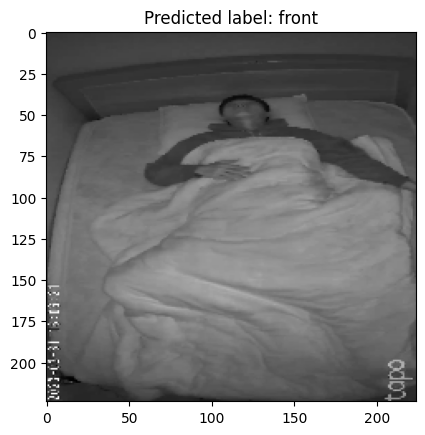

1/1 [==============================] - 0s 266ms/step
Image: /content/drive/MyDrive/image/front1364.jpg
Class: front
Prediction: 0.0


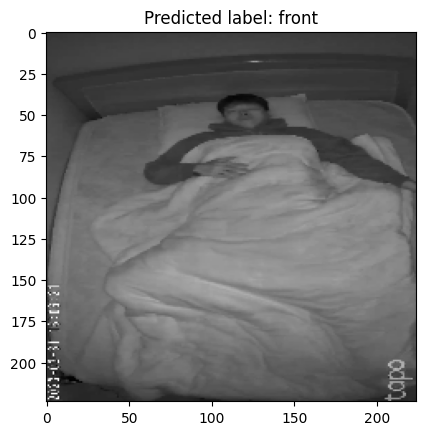

1/1 [==============================] - 0s 268ms/step
Image: /content/drive/MyDrive/image/front1351.jpg
Class: front
Prediction: 0.0


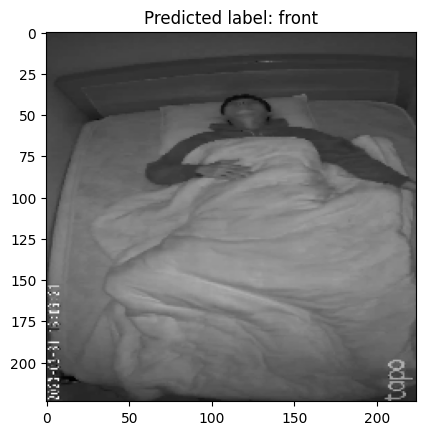

1/1 [==============================] - 0s 263ms/step
Image: /content/drive/MyDrive/image/back_left_left556.jpg
Class: front
Prediction: 0.0


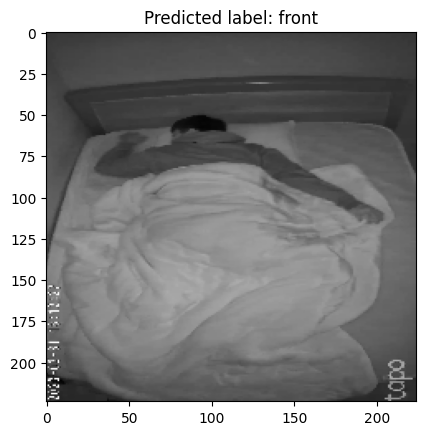

1/1 [==============================] - 0s 270ms/step
Image: /content/drive/MyDrive/image/back_left_left622.jpg
Class: front
Prediction: 0.0


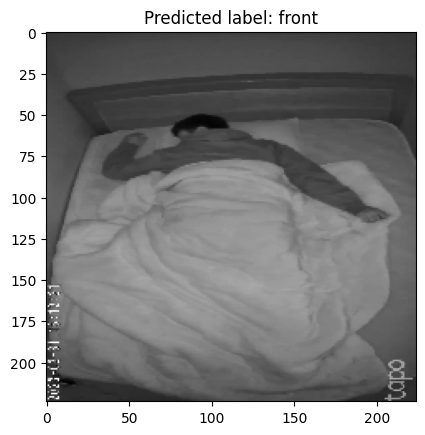

error: ignored

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/ResNet101_Practice2.h5')

# 이미지가 있는 폴더 경로
image_folder_path = '/content/drive/MyDrive/image'

# 폴더 내 이미지 파일 리스트 가져오기
image_list = os.listdir(image_folder_path)

# 이미지 파일 하나씩 읽어서 분류 결과 출력
for image_file in image_list:
  image_path = os.path.join(image_folder_path, image_file) # 이미지 경로

# 이미지 전처리
  img = cv2.imread(image_path)
  img = cv2.resize(img, dsize=(224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.expand_dims(img, axis=0)

# 분류 결과 출력
  pred = model.predict(img)[0]
  class_idx = np.argmax(pred)
  class_name = ['front', 'back'][class_idx]
  print(f'Image: {image_path}\nClass: {class_name}\nPrediction: {pred[class_idx]}')

# 이미지와 예측 결과 출력
  plt.imshow(img[0])
  plt.title(f'Predicted label: {class_name}')
  plt.show()